# ITMAL Exercise


REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section.           

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  


You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

NAME           |   SYMBOL   | ALIAS
---------------| --------------------
true positives | $TP$ |
true negatives | $TN$ | 
false positives| $FP$ | type I error 
false negatives| $FN$ | type II error 

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand{\subtext}[1]{_{\scriptsize{\mbox{#1}}}}
\newcommand{\st}[1]{\subtext{#1}}
\ba
 p &= \frac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \frac{TP}{TP + FN}\\
      &= \frac{TP}{TP + FN}\\ 
      &= \frac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \frac{TP + TN}{TP + TN + FP + FN}\\
        &= \frac{TP + TN}{N}\\
        &= \frac{TP + TN}{N_P + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \frac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1     &= \frac{2pr}{p+r}\\
            &=\frac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion} =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

Implement a general accuracy function `MyAccuracy`, that takes `y_pred` and `y_true` as input parameters.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

In [2]:
# TODO: Qa...
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys, os
sys.path.append(os.path.join(os.path.curdir, os.path.pardir))
from libitmal.dataloaders import MNIST_GetDataSet
from libitmal import utils
from libitmal.classifiers import DummyClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

#pretty much just a confusion matrix, but better than copypasting a bunch of code.
def performanceMetrics(y_pred, y_true):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_true)):
        if y_pred[i] == y_true[i] == 1:
            TP += 1
        if y_pred[i] == y_true[i] == 0:
            TN += 1
        if y_true[i] == 1 and y_pred[i]!=y_true[i]:
            FP += 1
        if y_true[i] == 0 and y_pred[i]!=y_true[i]:
            FN += 1
    return TN, FP, FN, TP 

def MyAccuracy(y_pred, y_true):
    # TODO: you impl here
    TN,FP,FN,TP = performanceMetrics(y_pred,y_true)
    return (TP + TN) / len(y_true)


# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestAccuracy(y_pred, y_true):
    a0=MyAccuracy(y_pred, y_true)
    a1=accuracy_score(y_pred, y_true)

    print("\nmy a          =",a0)
    print("scikit-learn a=",a1)

    utils.InRange(a0,a1)
    
#pretty much copied from Qa dummy_classifier
X, y = MNIST_GetDataSet()

#print("X.shape=",X.shape) # print X.shape= (70000, 28, 28)
if X.ndim==3:
    #print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
#print("X.shape=",X.shape) # X.shape= (70000, 784)

X_train, X_test, y_train, y_test = train_test_split(X,y)

y_train_5 = (y_train == 5)    
y_test_5  = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

y_test_predict = sgd_clf.predict(X_test)

TestAccuracy(y_test_5, y_test_predict)
#for the dummy classifier
dummy = DummyClassifier()

y_dummy_predict = dummy.predict(X_test)

TestAccuracy(y_test_5, y_dummy_predict)


my a          = 0.9559428571428571
scikit-learn a= 0.9559428571428571

my a          = 0.9098285714285714
scikit-learn a= 0.9098285714285714


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [3]:
# TODO: Qb..

def MyPrecision(y_pred, y_true):
    # TODO: you impl here
    TN,FP,FN,TP = performanceMetrics(y_pred,y_true)
    tpfp = TP+FP
    if tpfp <= 0:
        #should probably be an exception.
        return 0
    return TP / tpfp

def MyRecall(y_pred, y_true):
    # TODO: you impl here
    TN,FP,FN,TP = performanceMetrics(y_pred,y_true)
    return TP / (TP + FN)
    
def MyF1Score(y_pred, y_true):
    # TODO: you impl here
    p = MyPrecision(y_pred,y_true)
    r = MyRecall(y_pred,y_true)
    if p+r == 0:
        return 0 #should be an exception
    return 2 / ((1/p)+(1/r))

# TODO: your test code here!

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestPrecision(y_pred, y_true):
    p0=MyPrecision(y_pred, y_true)
    p1=precision_score(y_pred, y_true)

    print("\nmy p          =",p0)
    print("scikit-learn p=",p1)

    utils.InRange(p0,p1)

def TestRecall(y_pred, y_true):
    r0=MyRecall(y_pred, y_true)
    r1=recall_score(y_pred, y_true)

    print("\nmy r          =",r0)
    print("scikit-learn r=",r1)

    utils.InRange(r0,r1)

def TestMyF1Score(y_pred, y_true):
    f1_0=MyF1Score(y_pred, y_true)
    f1_1=f1_score(y_pred, y_true)

    print("\nmy f1          =",f1_0)
    print("scikit-learn f1=",f1_1)

    utils.InRange(f1_0,f1_1)
    
TestPrecision(y_test_5, y_test_predict)
TestPrecision(y_test_5, y_dummy_predict)

TestRecall(y_test_5, y_test_predict)
TestRecall(y_test_5, y_dummy_predict)

TestMyF1Score(y_test_5, y_test_predict)
TestMyF1Score(y_test_5, y_dummy_predict)
print("ok")


my p          = 0.7043037974683545
scikit-learn p= 0.7043037974683545


C:\Users\Rasmus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



my p          = 0
scikit-learn p= 0.0

my r          = 0.8814955640050697
scikit-learn r= 0.8814955640050697

my r          = 0.0
scikit-learn r= 0.0

my f1          = 0.783000281452294
scikit-learn f1= 0.7830002814522937

my f1          = 0
scikit-learn f1= 0.0
ok


C:\Users\Rasmus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Did you manage to print the confusion matrix for both the Dummy and the SGD classifier?

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal). See if you can print the confusion matrix (some test code below for inspiration).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

Finally, compare the real and symmetric auto-covariance matrix, $\Sigma$, with the real but non-symmetric confusion matrix, $\mathbf{M}$. What does the diagonal represent in the covar- and confusion matrix respectively, and why is the covar- symmetric, but the confusion not? 

In [4]:
# TODO: Qc
from sklearn.metrics import confusion_matrix
import numpy as np

# TEST CODE: some demo code to produce a 'test' confusion matrix using the SGD model 
M=confusion_matrix(y_test_5,y_test_predict)
utils.PrintMatrix(M,"M=\n")
#TP is at index 3, FP is at index 1, FN is at index 2 and TN is at index 0.

M=confusion_matrix(y_test_predict, y_test_5)
utils.PrintMatrix(M,"Messed up M=\n")

#When the parameters are messed up, the values of FN and FP are swapped around

print(f"cov-matrix:\n{np.cov(y_test_predict, y_test_5)}")
#

M=
[[15338   584]
    [  187  1391]]
Messed up M=
[[15338   187]
              [  584  1391]]
cov-matrix:
[[0.10012613 0.06931319]
 [0.06931319 0.08204523]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML], pp96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

Heatmap for M_SGD:
[[15338   584]
 [  187  1391]]


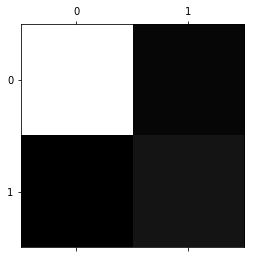

Heatmap for M_dummy:
[[15922     0]
 [ 1578     0]]


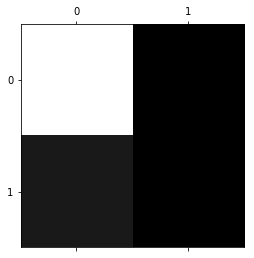

In [5]:
# TODO: Qd
M_SGD = confusion_matrix(y_test_5,y_test_predict)
M_dummy = confusion_matrix(y_test_5, y_dummy_predict)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
print(f"Heatmap for M_SGD:\n{M_SGD}")
plt.matshow(M_SGD,cmap=plt.cm.gray)
plt.show()
print(f"Heatmap for M_dummy:\n{M_dummy}")
plt.matshow(M_dummy,cmap=plt.cm.gray)
plt.show()

#### Qe Run a classifier on your data

Finally, try to run a classifier on the data-set you selected previously, perhaps starting with the SGD.

Is it possible to classify at all on your data, or do we need regression instead?

Are you able to do supervised learning, or are there no obvious `y_true` data in your set at all?

If your data is in the form, where you are able to do supervised-classification, could you produce a confusion matrix heatmap, then?

In [6]:
# TODO: Qe...
#copied from dataset Qg
import pandas as pd

wine_data = pd.read_csv(os.path.join('..', 'datasets', 'winequality-red.csv'))

wine_data.head()


#Det er meget oplagt at køre en classifier på dette data, da det handler om at inddele vine i kvalitets kategorier baseret på en længere række faktorer
#Quality transformeres fra en score fra 0-10, til en god/bad score, hvor (1 er good) når den er >6 og bad (0) når den er <=6.
bins = [0,6,10]
groups = [0,1]
y = pd.cut(wine_data['quality'],bins=bins, labels=groups)
X = wine_data.drop('quality',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,random_state=13)


In [7]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report

#SGD
sgd_clf = SGDClassifier(random_state=42)

sgd_clf = sgd_clf.fit(X_train,y_train)
sgd_prediction = sgd_clf.predict(X_test)

print("Metrics for SGD:")
print(classification_report(y_test,sgd_prediction))

#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)

rfc = rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)

print("Metrics for RFC:")
print(classification_report(y_test,rfc_prediction))

Metrics for SGD:
             precision    recall  f1-score   support

          0       0.93      0.58      0.72       345
          1       0.21      0.71      0.33        55

avg / total       0.83      0.60      0.66       400

Metrics for RFC:
             precision    recall  f1-score   support

          0       0.92      0.99      0.96       345
          1       0.87      0.49      0.63        55

avg / total       0.92      0.92      0.91       400



Heatmap for cm_sgd:
[[201 144]
 [ 16  39]]


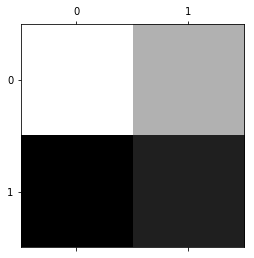

Heatmap for cm_rfc:
[[341   4]
 [ 28  27]]


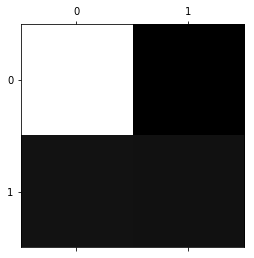

In [8]:
#Confusion matrix and heatmap for the models
cm_sgd = confusion_matrix(y_test,sgd_prediction)
print(f"Heatmap for cm_sgd:\n{cm_sgd}")
plt.matshow(cm_sgd,cmap=plt.cm.gray)
plt.show()


cm_rfc = confusion_matrix(y_test,rfc_prediction)
print(f"Heatmap for cm_rfc:\n{cm_rfc}")
plt.matshow(cm_rfc,cmap=plt.cm.gray)
plt.show()